# Homework 9 - Clustering
Isac do Nascimento Lira, 371890

1 - Aplique os algoritmos K-means [1] e AgglomerativeClustering [2] em qualquer dataset que você desejar (recomendação: iris). Compare os resultados utilizando métricas de avaliação de clusteres (completeness e homogeneity, por exemplo) [3].


In [2]:
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import  AgglomerativeClustering as AC
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
%matplotlib inline

In [3]:
# Carrega os dados

irisDF = datasets.load_iris()
X = irisDF.data
y = irisDF.target


In [4]:
# Instancia o classificador KMeans  e realiza a predição
n_clusters = 2
kmeans = KMeans(n_clusters = n_clusters,random_state = 0).fit(X)
predict = kmeans.predict(X)    

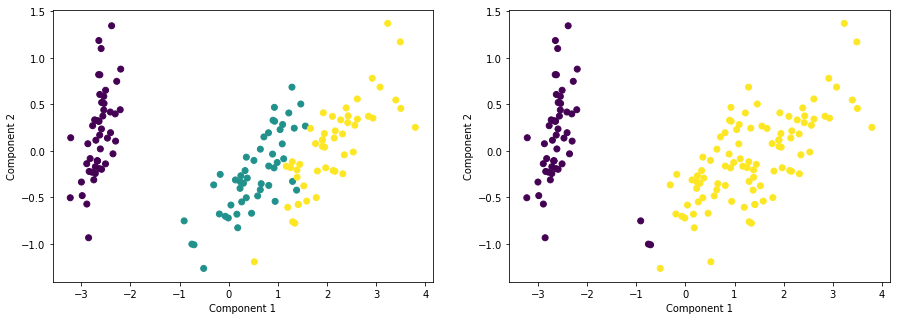

In [7]:
# Reduz os o número de features e visualiza os clusters formados
newSet = PCA(n_components=2).fit_transform(X)

fig,axs = plt.subplots(1,2,figsize=[15,5])
axs[0].scatter(newSet[:,0], newSet[:,1], c=y)
axs[0].set_xlabel('Component 1')
axs[0].set_ylabel('Component 2')
axs[1].scatter(newSet[:,0], newSet[:,1], c=predict)
axs[1].set_xlabel('Component 1')
axs[1].set_ylabel('Component 2')

In [31]:
# Calcula as métricas  - Homogeneidade e Completude

hg_kmeans = metrics.homogeneity_score(y,predict) 
cs_kmeans = metrics.completeness_score(y,predict) 
print('Métrica de homogeneida(KMeans): ',hg_kmeans)
print('Métrica de completude(KMeans): ',cs_kmeans)

Métrica de homogeneida(KMeans):  0.522322464101
Métrica de completude(KMeans):  0.883514234919


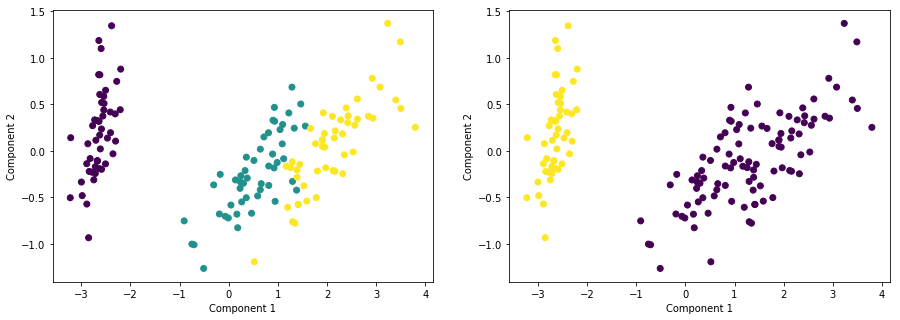

In [32]:
# Realiza a clusterização baseado em AgglomerativeClustering

predict_ac = AC(n_clusters = 2).fit_predict(X)
fig,axs = plt.subplots(1,2,figsize=[15,5])

axs[0].scatter(newSet[:,0], newSet[:,1], c=y)
axs[0].set_xlabel('Component 1')
axs[0].set_ylabel('Component 2')

axs[1].scatter(newSet[:,0], newSet[:,1], c=predict_ac)
axs[1].set_xlabel('Component 1')
axs[1].set_ylabel('Component 2')


In [33]:
hg_ac = metrics.homogeneity_score(y,predict_ac) 
cs_ac = metrics.completeness_score(y,predict_ac)

print('AglomerativeClustering Metrics')
print('Métrica de homogeneida: ',hg_ac)
print('Métrica de completude: ',cs_ac)

AglomerativeClustering Metrics
Métrica de homogeneida:  0.579380164286
Métrica de completude:  1.0


2 - Qual o valor de K (número de clusteres) você escolheu para a questão anterior? Desenvolva o Método do Cotovelo (não utilizar lib!) e descubra o K mais adequado. Após descobrir, aplique novamente o K-means com o K adequado. 


In [37]:
ks = np.arange(1,10)
homog_metrics = []
comp_metrics = []
for k in ks:
    kmeans = KMeans(n_clusters=k,random_state=0).fit(X)
    ypred = kmeans.predict(X)
    homog_metrics.append(metrics.homogeneity_score(y,ypred))
    comp_metrics.append(metrics.completeness_score(y,ypred))

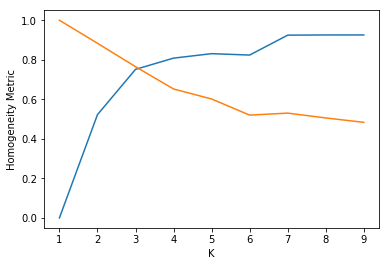

In [40]:
plt.plot(ks,homog_metrics)
plt.plot(ks,comp_metrics)
plt.xlabel('K')
plt.ylabel('Homogeneity Metric')


Pelo gráfico, o valor de k ideal é 3, pois balanceia as métricas de completude e homogeneidade. Apartir deste valor, também não há ganhos significativos na métrica de homogeneidade. No mais, o valor é coerente com o número de clusters real do dataset.

In [46]:
best_k = 3
predict = KMeans(n_clusters=best_k).fit_predict(X)

hg_kmeans = metrics.homogeneity_score(y,predict) 
cs_kmeans = metrics.completeness_score(y,predict) 
print('Métrica de homogeneida(KMeans): ',hg_kmeans)
print('Métrica de completude(KMeans): ',cs_kmeans)

Métrica de homogeneida(KMeans):  0.751485402199
Métrica de completude(KMeans):  0.764986151449


Houve um ganho significativo na métrica de homogeneidade e uma redução na completude.